# <div style="text-align:center;">Case Studies in Artificial Intelligence</div>
# <div style="text-align:center;">Final Project Progress Report</div>
### <div style="text-align:center;"></div>

This report will walk us through the exploratory data analysis.  The purpose of this analysis is to better understand the data and what factors go into determining how much food is wasted under a certain set of conditions.  We are also attempting to prove or dosprove our hypothesis that **enhancing food storage and preservation will lead to a reduction of food wastage**.



In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import plotly.graph_objects as go
from pyforest import *
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

The following is a sample of the dataset that we will be using:

In [20]:
df_food = pd.read_csv('food_wastage_data.csv')
df_food.head()

<IPython.core.display.Javascript object>

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


## Pre-Processing and Exploratory Data Analysis

We move on to exploring the data.  We will first take a quick check of if there are any NA values in the data and count how many unique values are in each feature (particularly the categorical features).

In [21]:
# Checking for missing values
display(df_food.isnull().sum())

# Unique values in the columns
display(df_food.nunique())

Type of Food             0
Number of Guests         0
Event Type               0
Quantity of Food         0
Storage Conditions       0
Purchase History         0
Seasonality              0
Preparation Method       0
Geographical Location    0
Pricing                  0
Wastage Food Amount      0
dtype: int64

Type of Food              5
Number of Guests         39
Event Type                4
Quantity of Food         30
Storage Conditions        2
Purchase History          2
Seasonality               3
Preparation Method        3
Geographical Location     3
Pricing                   3
Wastage Food Amount      26
dtype: int64

We will also create a new feature called Wastage Percentage, which represents the amount of food wasted out of the amount of food observed.

In [22]:
# Creating a new column for the total food wastage percentage
df_food['Wastage Percentage'] = (df_food['Wastage Food Amount'] / df_food['Quantity of Food']) * 100

df_food.head()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount,Wastage Percentage
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25,5.555556
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40,8.000000
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27,7.277628
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32,6.438632
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25,6.250000


Next, we want to visualize the data to better understand some of the relationships between the features and food wastage.  We start by plotting a histogram of food wastage itself.

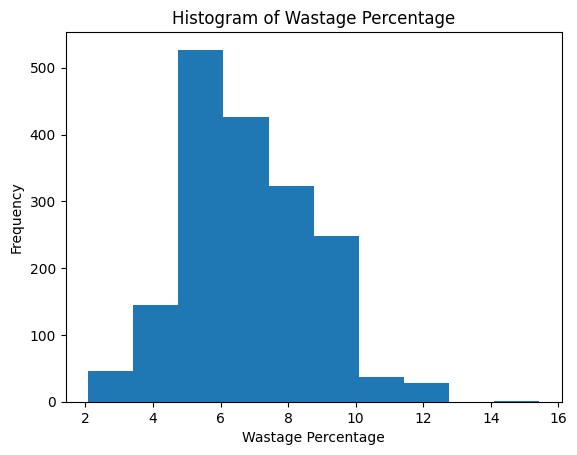

In [23]:
# Histogram of the Wastage Percentage   
# plt.style.use('seaborn-whitegrid')
plt.get_cmap('viridis')
plt.hist(df_food['Wastage Percentage'])
plt.xlabel('Wastage Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Wastage Percentage')
plt.show()

Immediately we can see that more focus should be on the restaurants having wastage between the percentage ranging from 5 to 10, since that is where most of the frequency is coming from.  Obviously it is also important to address restaurants with 10%+ as well, but given how infrequent they are we would have more of an impact addressing the more dense part of the distribution.

Next, we will plot a bar chart that measures food wastage by food category.

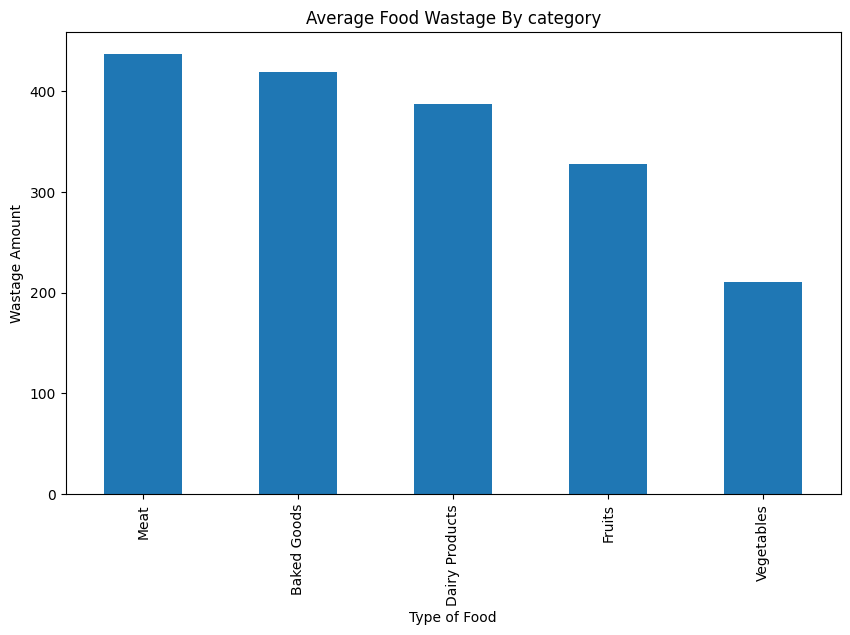

Type of Food
Meat              437
Baked Goods       419
Dairy Products    387
Fruits            328
Vegetables        211
Name: count, dtype: int64

In [24]:
# Bar chart for the food category with wastage amount
df_food['Type of Food'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Average Food Wastage By category')
plt.xlabel('Type of Food')
plt.ylabel('Wastage Amount')
plt.show()

# Value counts for the food category
df_food['Type of Food'].value_counts()

Meat is the most wasted followed by Baked goods and Vegetables being the least wasted.  This makes sense since meats have the most potential to spoil.

We move on to measuring the wastage amount by food pricing.

In [25]:
# Pie chart for Pricing and wastage amount using plotly express
labels = df_food['Pricing'].value_counts().index
values = df_food['Pricing'].value_counts().values
# theme template
fig = go.Figure(data=[go.Pie(labels=labels, values=values,  textinfo='percent+label', insidetextorientation='radial', pull = [0.2, 0, 0])], layout_title_text='Wastage Amount by Food Pricing', layout_title_x=0.5, layout_title_font_size=20)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

High Priced food tends to be wasted more then Moderate or low priced foods.

Now we want to model how number of guests affects food wastage.  We do so with the following bar chart:

<IPython.core.display.Javascript object>

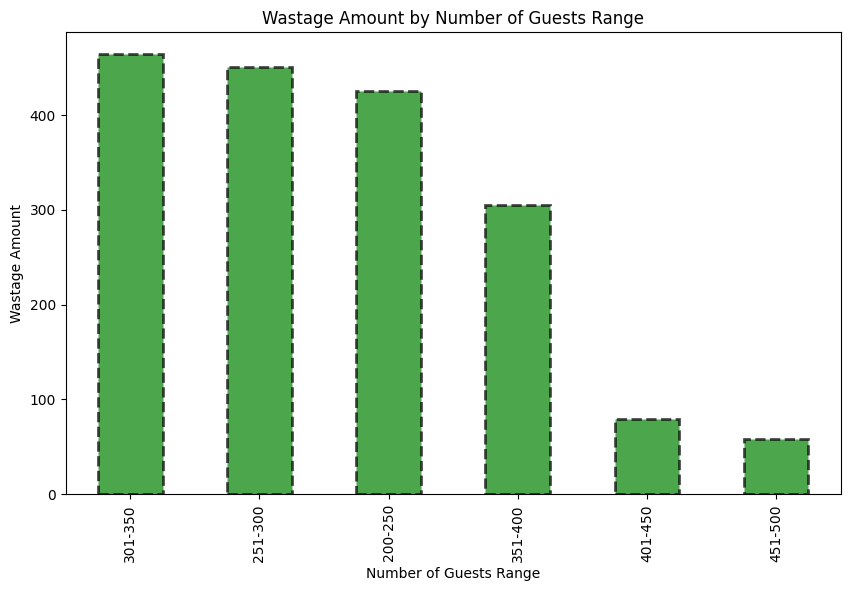

In [26]:
# Creating bins for the Number of Guests
bins = [200, 250, 300, 350, 400, 450, 500]
labels = ['200-250', '251-300', '301-350', '351-400', '401-450', '451-500']
df_food['Number of Guests Range'] = pd.cut(df_food['Number of Guests'], bins=bins, labels=labels)

# Bar chart for the number of guests range and wastage amount 
df_food['Number of Guests Range'].value_counts().plot(kind='bar', figsize=(10, 6), color='green', alpha=0.7, edgecolor='black', linewidth=2, linestyle='--') 
plt.style.use('dark_background')
plt.title('Wastage Amount by Number of Guests Range')
plt.xlabel('Number of Guests Range')
plt.ylabel('Wastage Amount')
plt.show()

As number of guests increases, the amount of food wasted increases.  

Next, we will look at how event type affects food wastage.

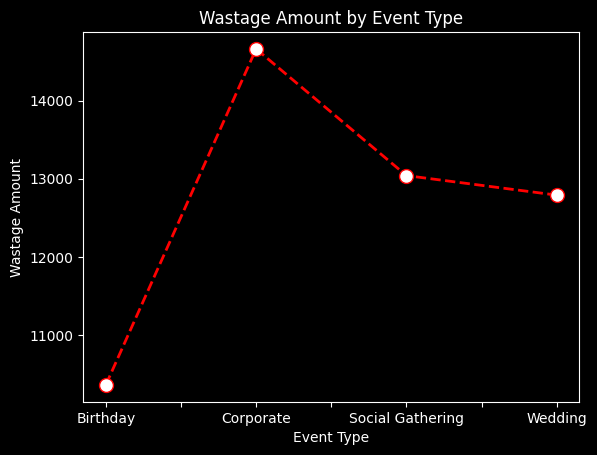

In [27]:
# Line plot for Event type and wastage amount
df_food.groupby('Event Type')['Wastage Food Amount'].sum().plot(kind='line', marker='o', color='red', linestyle='--', linewidth=2, markersize=10, markerfacecolor='white')
plt.title('Wastage Amount by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Wastage Amount')
plt.show()

Birthdays Tends to have the least amount of food wastage whereas corporate events contributes to maximum amount of food wastage.

Lastly, we will look at how geographical conditions affects food wastage.

In [28]:
# Box Plot for Geographical condition and wastage amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geographical Location', y='Wastage Food Amount', data=df_food, palette='viridis')
plt.title('Wastage Amount by Geographical Location')
plt.xlabel('Geographical Location')
plt.ylabel('Wastage Amount')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

<Figure size 1000x600 with 0 Axes>

Rural tends to see a lit lower food wastage, but overall these box plots are very similar suggesting little difference in food wastage among geographical location.

## Statistical Tests

Now that we have a solid understanding of or data, we will perform some statistical tests to determine what factors do and do not affect food wastage.  First, let's look at the correlation between the number of guests and food wastage amount.  In this case, the null hypothesis will be that there is no correlation between number of guests and food wastage amount.

In [ ]:
correlation, p_value = pearsonr(df_food['Number of Guests'], df_food['Wastage Food Amount'])
correlation, p_value

(0.650420701205876, 7.552167205273713e-215)

The large value of correlation suggest that there is a strong correlation between Number of features. The small p-value suggests that we can reject the null hypothesis and claim that there is strong evidence of number of guests and food wastage being correlated.

Next, let's look at some t-tests to compare food wastage amounts across different categories.  Now, the null hypothesis will be that there is no difference in food wastage between the compared variables.

In [ ]:
_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Pricing'] == 'High'],
                       df_food['Wastage Food Amount'][df_food['Pricing'] == 'Low'])
print(f'p-value of food wastage between high pricing and low pricing: {p_value}')
_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Preparation Method'] == 'Buffet'],
                       df_food['Wastage Food Amount'][df_food['Preparation Method'] == 'Finger Food'])
print(f'p-value of food wastage between buffets and finger foods: {p_value}')
_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Preparation Method'] == 'Buffet'],
                       df_food['Wastage Food Amount'][df_food['Preparation Method'] == 'Sit-down Dinner'])
print(f'p-value of food wastage between buffets and sit-down dinners: {p_value}')
_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Preparation Method'] == 'Sit-down Dinner'],
                       df_food['Wastage Food Amount'][df_food['Preparation Method'] == 'Finger Food'])
print(f'p-value of food wastage between sit-down dinners and finger foods: {p_value}')

p-value of food wastage between high pricing and low pricing: 6.83007347736536e-192
p-value of food wastage between buffets and finger foods: 9.238928308579242e-25
p-value of food wastage between buffets and sit-down dinners: 1.632058731429825e-07
p-value of food wastage between sit-down dinners and finger foods: 1.437398698944767e-78


Above, we calculated the p-values between all the options of pricing and the p-values between all the options in preparation method.  We can see that in all cases we reject the null hypothesis and claim that there is strong evidence that each factor compared above have statistically different food wastage amounts.

Recall that our original hypothesis is that food wastage can be reduced with better storage conditions of food.  From the data, we can measure this by comparing the two storage conditions: refrigerated and room temperature.  We perform the t-test below:

In [ ]:
_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Storage Conditions'] == 'Refrigerated'],
                       df_food['Wastage Food Amount'][df_food['Storage Conditions'] == 'Room Temperature'])
print(f'p-value of food wastage between refrigerated and room temperature: {p_value}')

p-value of food wastage between refrigerated and room temperature: 0.20746003989947806


Surprisingly, the p-value is too high for us to reject the null hypothesis that storage conditions affects food wastage.  

To break this down further, we will look at how storage conditions affects food wastage amount for each type of food.

In [ ]:
_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Meat'][df_food['Storage Conditions'] == 'Refrigerated'],
                       df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Meat'][df_food['Storage Conditions'] == 'Room Temperature'])
print(f'p-value of food wastage between refrigerated and room temperature for meats: {p_value}')

_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Baked Goods'][df_food['Storage Conditions'] == 'Refrigerated'],
                       df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Baked Goods'][df_food['Storage Conditions'] == 'Room Temperature'])
print(f'p-value of food wastage between refrigerated and room temperature for baked goods: {p_value}')

_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Dairy Products'][df_food['Storage Conditions'] == 'Refrigerated'],
                       df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Dairy Products'][df_food['Storage Conditions'] == 'Room Temperature'])
print(f'p-value of food wastage between refrigerated and room temperature for dairy products: {p_value}')

_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Fruits'][df_food['Storage Conditions'] == 'Refrigerated'],
                       df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Fruits'][df_food['Storage Conditions'] == 'Room Temperature'])
print(f'p-value of food wastage between refrigerated and room temperature for fruits: {p_value}')

_, p_value = ttest_ind(df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Vegetables'][df_food['Storage Conditions'] == 'Refrigerated'],
                       df_food['Wastage Food Amount'][df_food['Type of Food'] == 'Vegetables'][df_food['Storage Conditions'] == 'Room Temperature'])
print(f'p-value of food wastage between refrigerated and room temperature for vegetables: {p_value}')

p-value of food wastage between refrigerated and room temperature for meats: 0.0009720370092083859
p-value of food wastage between refrigerated and room temperature for baked goods: 0.24365751550770512
p-value of food wastage between refrigerated and room temperature for dairy products: 0.38245314897621974
p-value of food wastage between refrigerated and room temperature for fruits: 0.7210667691271535
p-value of food wastage between refrigerated and room temperature for vegetables: 0.9529311863653461


We can see that storage conditions matter when handling meats, but not so much when handling other food products.  Therefore, our original hypothesis is not totally far off.  Having better preservation systems does affect how much food is wasted, it just applies to meats the most.